In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import keras_tuner as kt

2025-03-03 22:15:34.372830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741058134.383464    7394 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741058134.386717    7394 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 22:15:34.398659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('28_datos_procesados.csv')

In [3]:
df.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1',
       'pm25_lag2', 'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6',
       'pm25_lag12', 'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_lag4',
       'no_lag5', 'no_lag6', 'no_lag12', 'no_lag24', 'no2_lag1', 'no2_lag2',
       'no2_lag3', 'no2_lag4', 'no2_lag5', 'no2_lag6', 'no2_lag12',
       'no2_lag24', 'nox_lag1', 'nox_lag2', 'nox_lag3', 'nox_lag4', 'nox_lag5',
       'nox_lag6', 'nox_lag12', 'nox_lag24', 'dviento_ssr_lag1',
       'dviento_ssr_lag2', 'dviento_ssr_lag3', 'dviento_ssr_lag4',
       'dviento_ssr_lag5', 'dviento_ssr_lag6', 'dviento_ssr_lag12',
       'dviento_ssr_lag24', 'haire10_ssr_lag1', 'haire10_ssr_lag2',
       'haire10_ssr_lag3', 'haire10_ssr_lag4', 'haire10_ssr_lag5',
       'haire10_ssr_lag6', 'haire10_ssr_lag12', 'haire10_ssr_lag24',
       'p_ssr_lag1', 'p_ssr_lag2', 'p_ssr_lag3', 'p_ssr_lag4', 'p_s

In [4]:
features = [
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop(['Fecha_Hora'], axis=1, inplace=True)

In [7]:
df['pm25'].describe()

count    61344.000000
mean        20.628072
std          9.164789
min          0.500000
25%         14.000000
50%         20.000000
75%         27.000000
max         47.638028
Name: pm25, dtype: float64

# Verificación de variables numéricas

<Axes: >

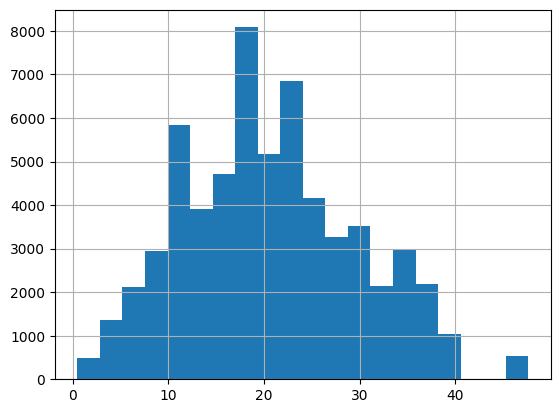

In [8]:
df['pm25'].hist(bins=20)

In [12]:
df['no'].describe()

count    61344.000000
mean        15.857095
std         16.917607
min          0.000694
25%          3.801325
50%          9.713706
75%         22.360675
max        119.885000
Name: no, dtype: float64

<Axes: >

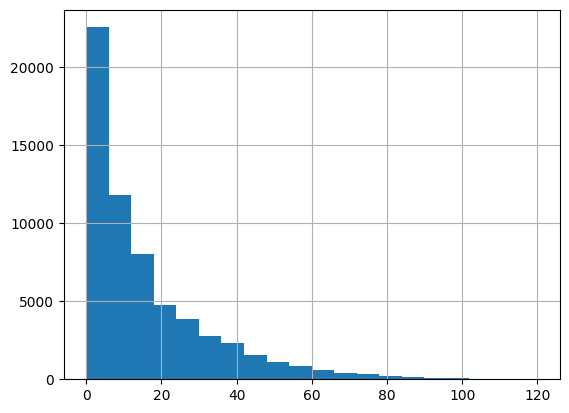

In [13]:
df['no'].hist(bins=20)

'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'

<Axes: >

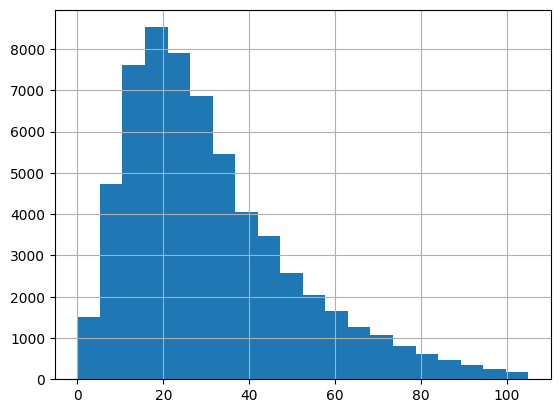

In [14]:
df['nox'].hist(bins=20)

In [15]:
#df['pm25_log']=np.log(df['pm25'])

In [16]:
#df['pm25_log'].hist(bins=20)

In [17]:
df['pm25'].describe()

count    61344.000000
mean        20.628072
std          9.164789
min          0.500000
25%         14.000000
50%         20.000000
75%         27.000000
max         47.638028
Name: pm25, dtype: float64

<Axes: xlabel='no2', ylabel='pm25'>

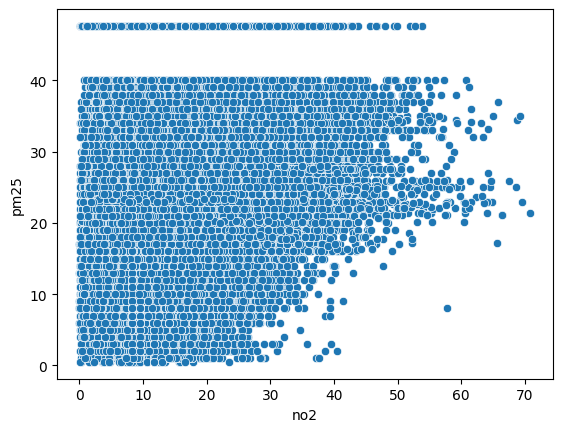

In [18]:
sns.scatterplot(data=df, y='pm25', x='no2')

# Particion de los datos

In [9]:
y=df['pm25']
X=df.drop('pm25', axis=1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Modelo de Random Forest

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)])

In [12]:
pipeline=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

In [13]:
param_grid = {
    # 'n_estimators': np.arange(10,210,10),
    'regressor__n_estimators': [250],
    'regressor__max_depth': [150],
    'regressor__criterion': ['squared_error']
}

In [147]:
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2)
RF_gridSearch.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.2min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.2min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.3min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.3min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.3min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.3min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total time=14.4min
[CV] END regressor__criterion=squared_error, regressor__max_depth=150, regressor__n_estimators=250; total 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag2',
       'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_l...
       'vviento_ssr_lag2', 'vviento_ssr_lag3', 'vviento_ssr_lag4',
       'vviento_ssr_lag5', 'vviento_ssr_lag6', 'vviento_ssr_lag12',
       'vviento_ssr_lag24'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error'],
                         'regressor__max_depth': [150],
                         'regressor__n_estimators': [250]},
             scoring='neg_mean_squared_error', verbose=2)

In [149]:
best_estimator = RF_gridSearch.best_estimator_

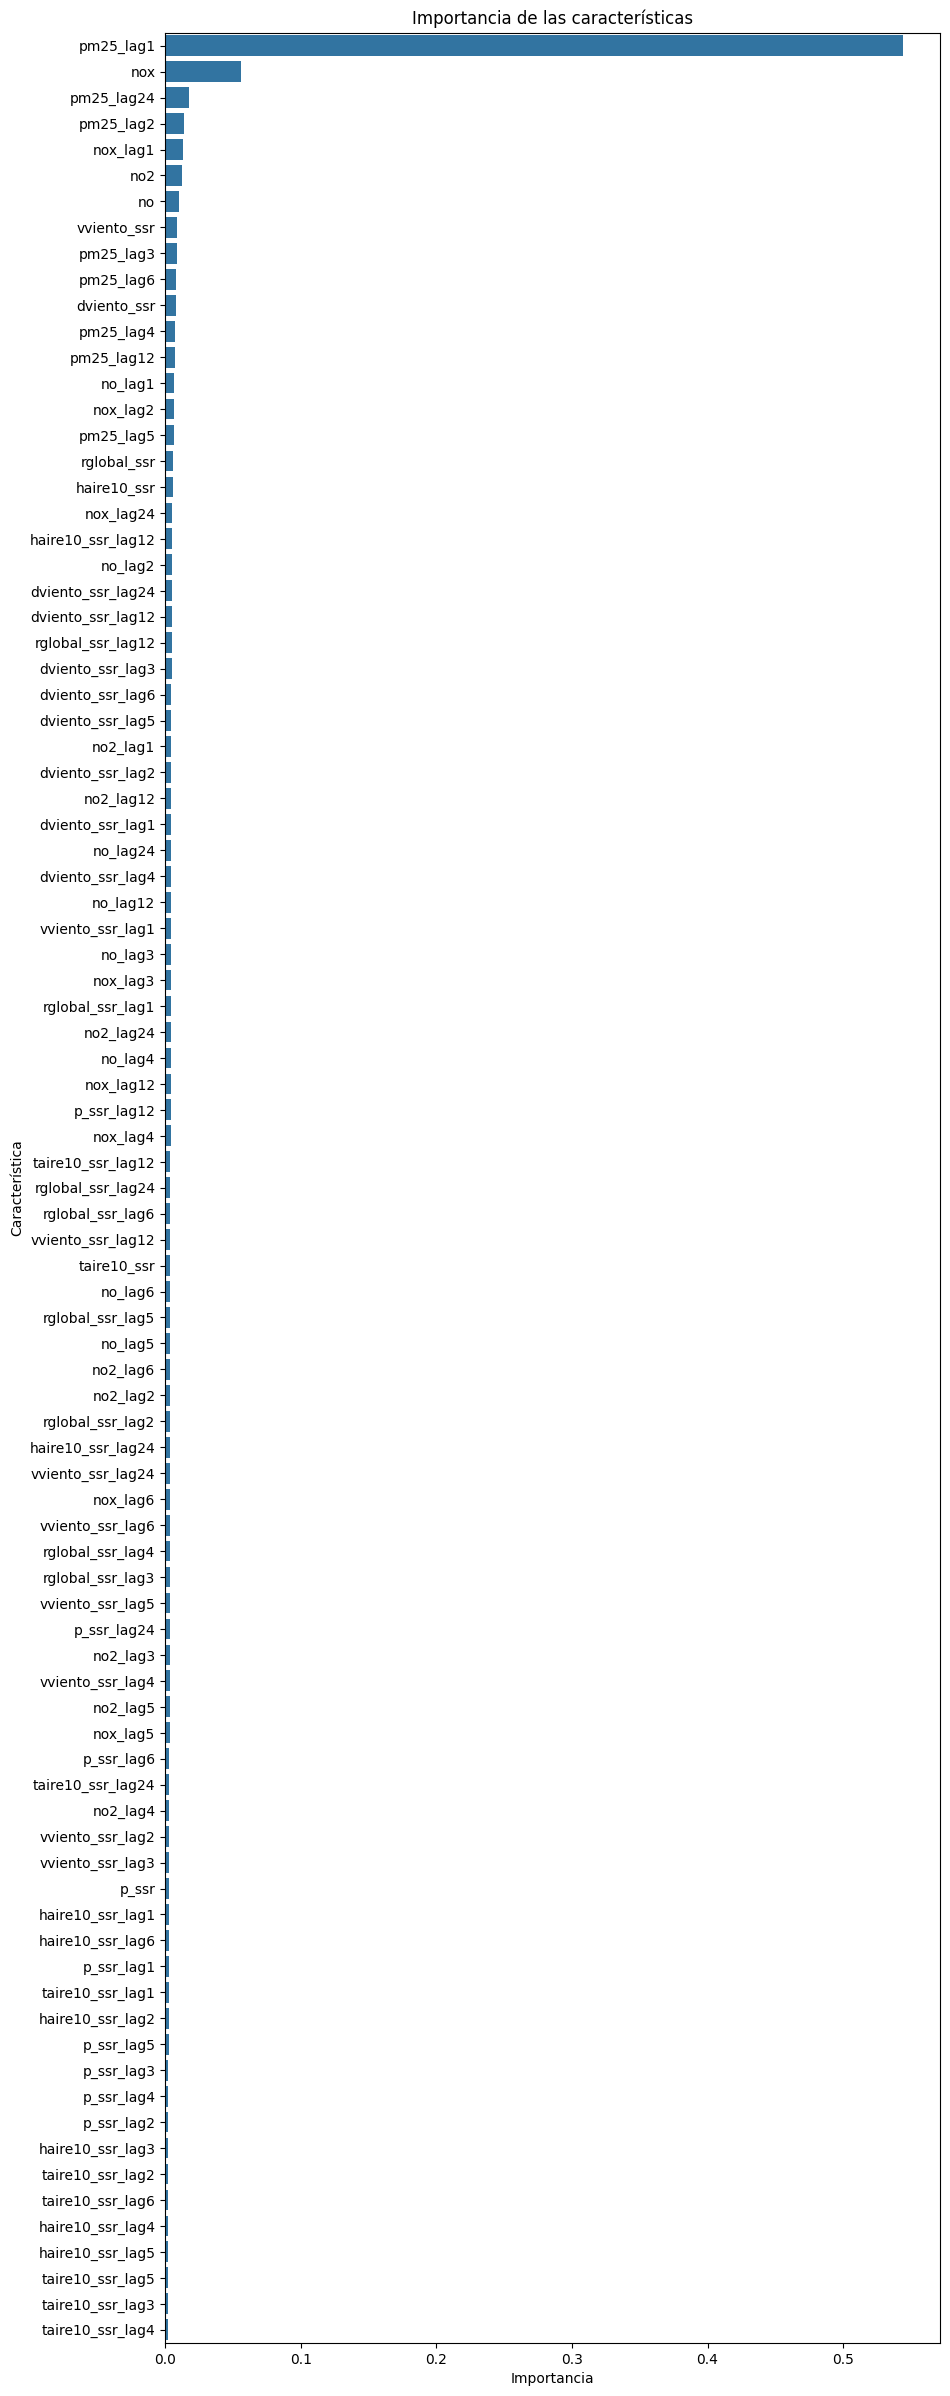

In [150]:
# Feature importance
importances = best_estimator.named_steps['regressor'].feature_importances_
# DataFrame con importancias
importances_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importancia'])
# Ordenar importancias
importances_df = importances_df.sort_values(by='Importancia', ascending=False)
# Gráfico de barras
plt.figure(figsize=(10, 30))
sns.barplot(x='Importancia', y=importances_df.index, data=importances_df)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

In [151]:
importances_df.head(10)

,Importancia
pm25_lag1,0.544364
nox,0.056061
pm25_lag24,0.017404
pm25_lag2,0.014240
nox_lag1,0.013440
no2,0.012410
no,0.010518
vviento_ssr,0.008884
pm25_lag3,0.008479
pm25_lag6,0.008150


In [152]:
y_pred = best_estimator.predict(X_test)

In [158]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MSE: 41.49446205037652
RMSE: 6.441619520770884
R2: 0.6719274090776798


((array([-3.74446109, -3.51556711, -3.38972502, ...,  3.38972502,
          3.51556711,  3.74446109]),
  array([-27.54581121, -26.09479083, -25.59224675, ...,  33.70461975,
          40.1842688 ,  42.55050039])),
 (np.float64(6.371166629849829),
  np.float64(-0.13074435248219973),
  np.float64(0.9888170620690374)))

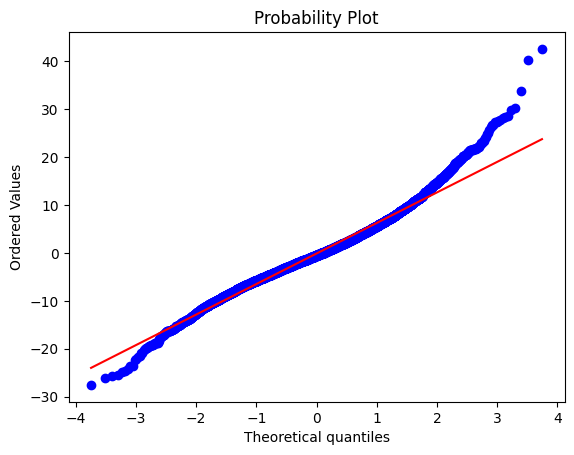

In [159]:
# Do the errors follow a normal distribution?
errors = y_test - y_pred
# Plot the QQ plot
stats.probplot(errors, dist="norm", plot=plt)

# Modelo de red neuronal

In [14]:
# Apply manually the preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

In [17]:
def model_builder(hp):
    # Se crea un modelo secuencial
    model = tf.keras.models.Sequential()
    # Se agrega una capa de entrada
    model.add(tf.keras.layers.InputLayer(input_shape=X_train_preprocessed.shape[1:]))
    # Se optimiza el número de capas ocultas
    n_layers = hp.Int('num_hidden_layers', min_value=2, max_value=6)
    # Optimize regularization parameters
    regularizer_choice = hp.Choice('regularizer', values=['none', 'l1', 'l2', 'l1_l2'])
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    
    # Get regularizer based on choice
    if regularizer_choice == 'l1':
        regularizer = tf.keras.regularizers.L1(hp.Float('l1_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l2':
        regularizer = tf.keras.regularizers.L2(hp.Float('l2_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l1_l2':
        regularizer = tf.keras.regularizers.L1L2(
            l1=hp.Float('l1_l1l2_value', min_value=1e-4, max_value=1e-2),
            l2=hp.Float('l2_l1l2_value', min_value=1e-4, max_value=1e-2)
        )
    else:
        regularizer = None
    # Se optimiza el número de neuronas por capa
    for i in range(n_layers):
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int('units_' + str(i), min_value=10, max_value=100, step=10), 
                activation='relu',
                kernel_regularizer=regularizer
            )
        )
        if dropout_rate > 0.0:
            model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    # Se agrega la capa de salida
    model.add(tf.keras.layers.Dense(1))
    # Se optimiza el learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2])

    # Se compila el modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=hp_learning_rate),
        loss='mean_squared_error'
    )

    return model

In [18]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [19]:
# Configure the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='mlp_tuning',
    project_name='pm25_mlp'
)

Reloading Tuner from mlp_tuning/pm25_mlp/tuner0.json


In [20]:
tuner.search(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])

In [21]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
mlp_history=model.fit(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])
model.evaluate(X_test_preprocessed, y_test)

/home/manuel/Documents/Maestria_Analitica/Semestre_II/Propuesta-de-TDG/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1741058309.113868    7394 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5751 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1741058312.801459   10565 service.cc:148] XLA service 0x72611c003940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741058312.807630   10565 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-03-03 22:18:32.965725: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741058313.283828   10565 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-03 22:18:33.409591: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2025-03-03 22:1

 180/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 117.1889

I0000 00:00:1741058315.312911   10565 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1406/1438 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 54.9883

2025-03-03 22:18:37.462506: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_325', 16 bytes spill stores, 16 bytes spill loads



1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 54.6305 - val_loss: 34.5875
Epoch 2/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 34.0622 - val_loss: 33.4543
Epoch 3/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 33.7677 - val_loss: 32.1245
Epoch 4/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 32.6339 - val_loss: 31.9647
Epoch 5/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - loss: 32.2568 - val_loss: 32.2439
Epoch 6/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 31.7132 - val_loss: 31.6815
Epoch 7/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 31.7532 - val_loss: 32.5648
Epoch 8/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 31.2344 - val_loss: 31.3518
Epoch 9/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 31.4279 - val_loss: 32.0453
Epoch 10/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 30.9668 - val_loss: 31.4736
Epoch 11/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 31.2419 - val_los

30.645742416381836

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,345 (220.10 KB)

 Trainable params: 18,781 (73.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,564 (146.74 KB)

In [24]:
# Evaluate on test set
test_loss = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test_preprocessed)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 30.6019
Test Loss: 30.645742416381836
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
Mean Squared Error: 30.6458
Root Mean Squared Error: 5.5359
R² Score: 0.6372


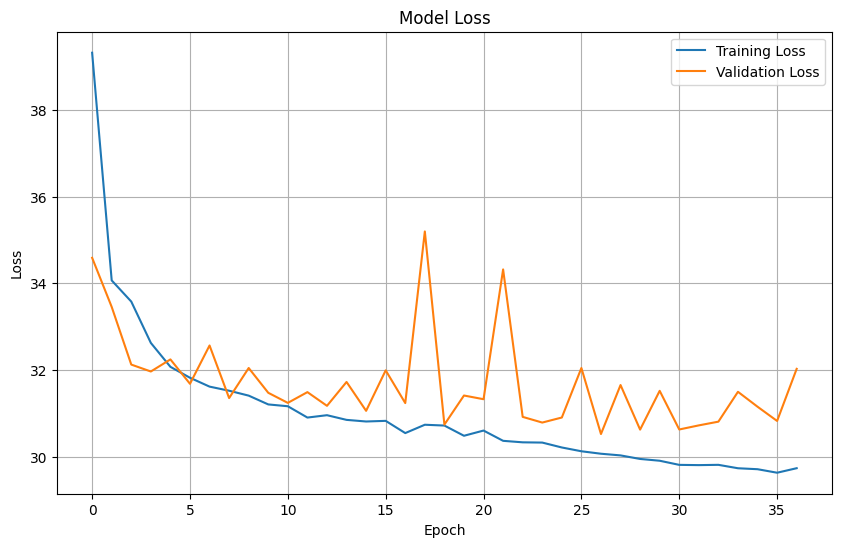

In [25]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

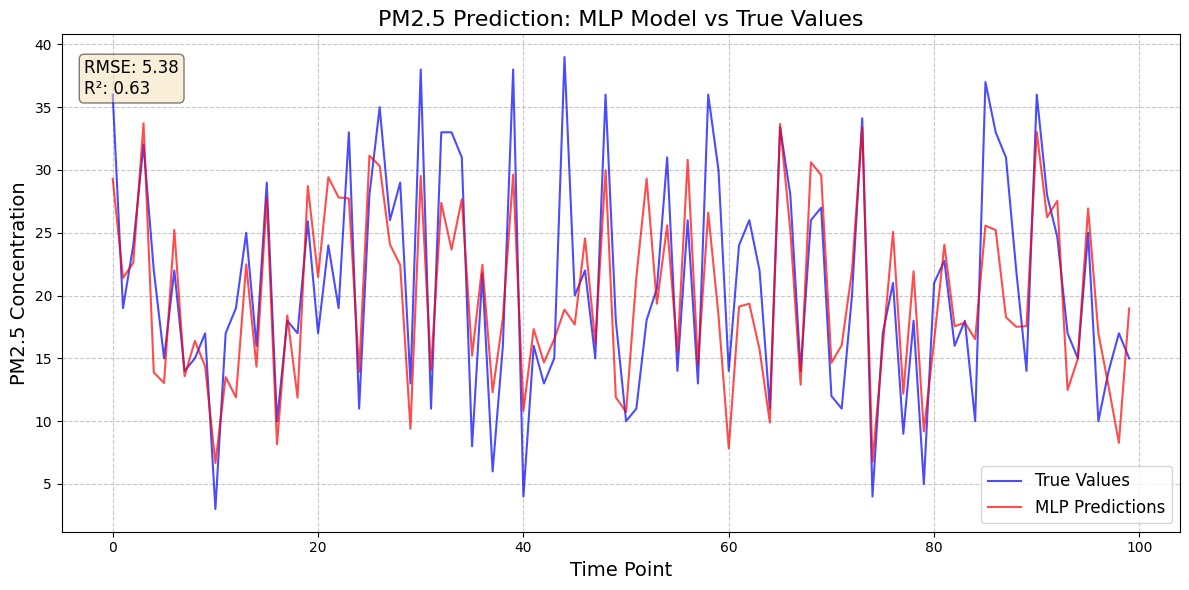

In [26]:
# Create a time series plot comparing predictions with true values
plt.figure(figsize=(12, 6))

y_test_plot=y_test[:100]
y_pred_plot=y_pred[:100]

# Create an index for the x-axis (representing time points)
time_index = range(len(y_test_plot))

# Plot true values
plt.plot(time_index, y_test_plot.values, 'b-', label='True Values', alpha=0.7)

# Plot predicted values
plt.plot(time_index, y_pred_plot, 'r-', label='MLP Predictions', alpha=0.7)

# Add a legend, title and labels
plt.title('PM2.5 Prediction: MLP Model vs True Values', fontsize=16)
plt.xlabel('Time Point', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add information about model performance
textstr = f'RMSE: {np.sqrt(mean_squared_error(y_test_plot, y_pred_plot)):.2f}\nR²: {r2_score(y_test_plot, y_pred_plot):.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

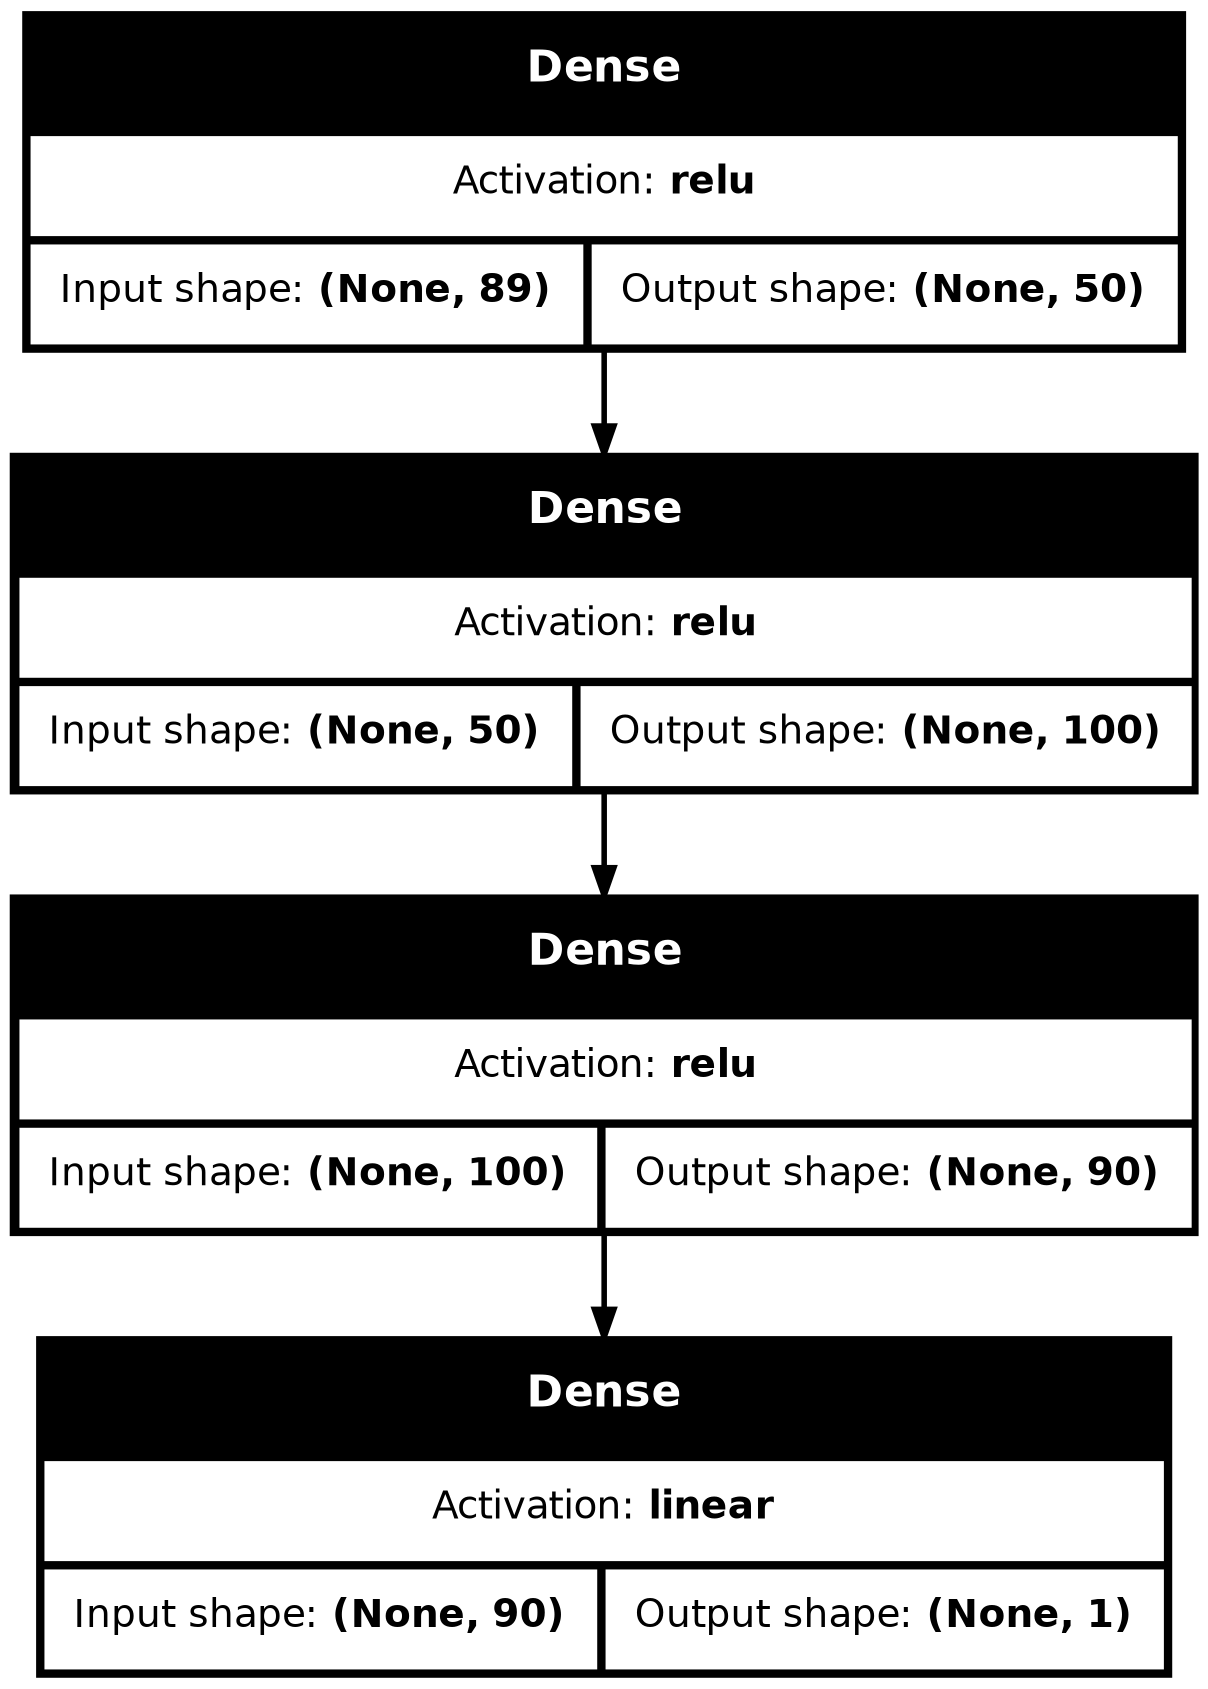

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

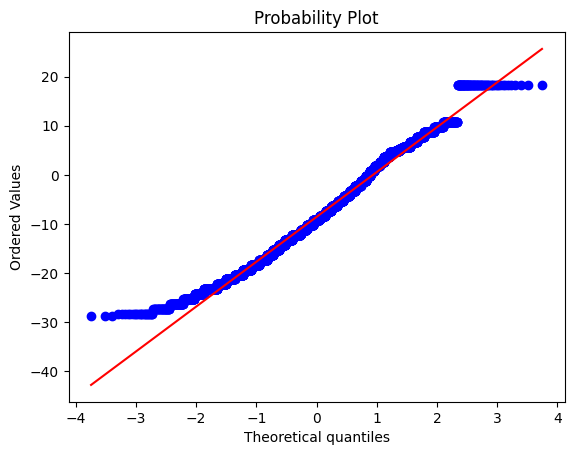

In [27]:
# Plot the QQ plot
errors = y_test - y_pred[0]
stats.probplot(errors, dist="norm", plot=plt)
plt.show()

# 3. Modelo LSTM

In [32]:
def create_multivariate_sequences(data, target_col_idx, seq_length):
    """
    Create sequences from multivariate time series data
    
    Parameters:
    -----------
    data : numpy.ndarray
        Multivariate time series data with shape (n_samples, n_features)
    target_col_idx : int
        Index of the target column (PM2.5) in the data
    seq_length : int
        Length of the sequences to create (lookback window)
        
    Returns:
    --------
    tuple
        (X, y) where X has shape (n_samples, seq_length, n_features)
        and y has shape (n_samples, 1)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Include all features for X
        X.append(data[i:i + seq_length, :])
        # Only predict the target variable (PM2.5)
        y.append(data[i + seq_length, target_col_idx:target_col_idx+1])
    return np.array(X), np.array(y)

In [33]:
df.columns

Index(['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag2',
       'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_lag4', 'no_lag5',
       'no_lag6', 'no_lag12', 'no_lag24', 'no2_lag1', 'no2_lag2', 'no2_lag3',
       'no2_lag4', 'no2_lag5', 'no2_lag6', 'no2_lag12', 'no2_lag24',
       'nox_lag1', 'nox_lag2', 'nox_lag3', 'nox_lag4', 'nox_lag5', 'nox_lag6',
       'nox_lag12', 'nox_lag24', 'dviento_ssr_lag1', 'dviento_ssr_lag2',
       'dviento_ssr_lag3', 'dviento_ssr_lag4', 'dviento_ssr_lag5',
       'dviento_ssr_lag6', 'dviento_ssr_lag12', 'dviento_ssr_lag24',
       'haire10_ssr_lag1', 'haire10_ssr_lag2', 'haire10_ssr_lag3',
       'haire10_ssr_lag4', 'haire10_ssr_lag5', 'haire10_ssr_lag6',
       'haire10_ssr_lag12', 'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag2',
       'p_ssr_lag3', 'p_ssr_lag4', 'p_ssr_lag5', 'p_s

In [34]:
# Select features to use
features = [
    'pm25',
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]  # Adjust based on your available data
data = df[features].values

In [35]:
data[0]

array([1.90000000e+01, 2.56556000e+00, 1.08821000e+01, 1.34436000e+01,
       2.78566000e+02, 7.86471000e+01, 6.37563000e+02, 1.37472039e+02,
       1.78553000e+01, 1.72479000e-01])

In [42]:
# Normalize all features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences with a window of 24 hours (for looking at previous 24h)
seq_length = 6
pm25_idx = 0  # Index of PM2.5 in your features list
X_lstm, y_lstm = create_multivariate_sequences(data_scaled, pm25_idx, seq_length)

# Split into train, validation, and test sets
X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(X_temp_lstm, y_temp_lstm, test_size=0.5, random_state=42)

# Report data shapes
print(f"X_train shape: {X_train_lstm.shape}")  # Should be (n_samples, seq_length, n_features)
print(f"y_train shape: {y_train_lstm.shape}")  # Should be (n_samples, 1)

X_train shape: (46003, 6, 10)
y_train shape: (46003, 1)


In [43]:
data_scaled.shape

(61344, 10)

In [44]:
data_scaled

array([[0.39246444, 0.02139451, 0.15357105, ..., 0.16709195, 0.17315426,
        0.03829305],
       [0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195, 0.14137766,
        0.06221357],
       [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195, 0.13204787,
        0.07347291],
       ...,
       [0.32882156, 0.03642433, 0.07641716, ..., 0.0864577 , 0.30851064,
        0.28926445],
       [0.49853591, 0.03076721, 0.06272149, ..., 0.0864577 , 0.29255319,
        0.177971  ],
       [0.49853591, 0.0290664 , 0.0538385 , ..., 0.0864577 , 0.28723404,
        0.22248838]])

In [45]:
X_lstm

array([[[0.39246444, 0.02139451, 0.15357105, ..., 0.16709195,
         0.17315426, 0.03829305],
        [0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195,
         0.14137766, 0.06221357],
        [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195,
         0.13204787, 0.07347291],
        [0.15910721, 0.02327015, 0.10693576, ..., 0.16709195,
         0.12636702, 0.11142687],
        [0.11667862, 0.04761879, 0.1175286 , ..., 0.16709195,
         0.12244681, 0.02958834],
        [0.15910721, 0.04498667, 0.10681227, ..., 0.16709195,
         0.11557447, 0.00782723]],

       [[0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195,
         0.14137766, 0.06221357],
        [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195,
         0.13204787, 0.07347291],
        [0.15910721, 0.02327015, 0.10693576, ..., 0.16709195,
         0.12636702, 0.11142687],
        [0.11667862, 0.04761879, 0.1175286 , ..., 0.16709195,
         0.12244681, 0.02958834],
        [0.15910721, 0.04498667, 0.106

In [46]:
# Define model architecture
def build_multivariate_lstm_model(seq_length, n_features, lstm_units=50, dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, 
                  input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.LSTM(units=lstm_units))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(seq_length, n_features):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True), 
                          input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
        loss='mean_squared_error')
    return model

# Get the number of features
n_features = X_train_lstm.shape[2]

# Create and compile the model
# lstm_model = build_multivariate_lstm_model(seq_length, n_features)
lstm_model = build_bidirectional_lstm_model(seq_length, n_features)
lstm_model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=60,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping],
    verbose=1
)

/home/manuel/Documents/Maestria_Analitica/Semestre_II/Propuesta-de-TDG/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 6, 64)          │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,177 (86.63 KB)

 Trainable params: 22,049 (86.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0303 - val_loss: 0.0173
Epoch 2/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 3/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0176 - val_loss: 0.0162
Epoch 4/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0174 - val_loss: 0.0164
Epoch 5/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0171 - val_loss: 0.0161
Epoch 6/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 7/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 8/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0169 - val_loss: 0.0156
Epoch 9/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0166 - val_loss: 0.0158
Epoch 10/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0165 - val_loss: 0.0166
Epoch 11/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0165 - val_loss: 0.0159
Epoch 12/60
1438/1438 ━━━━━━━

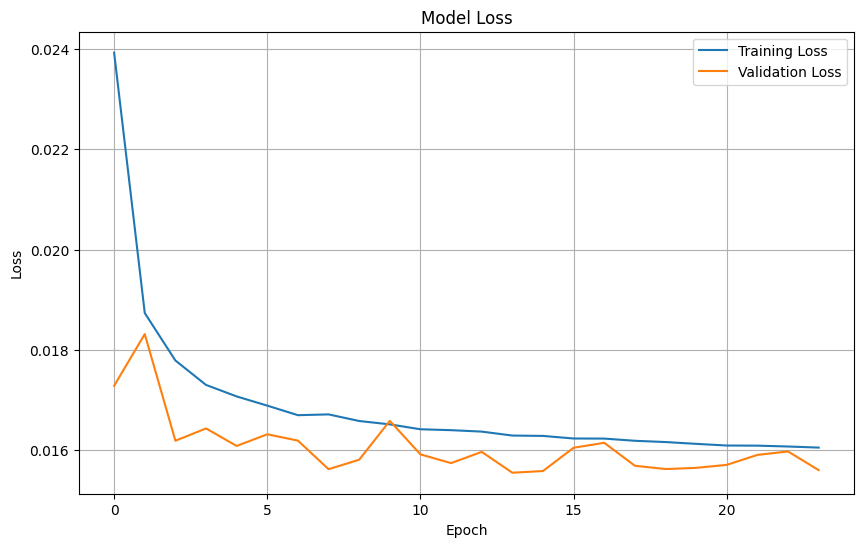

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160
Test Loss: 0.016409248113632202
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0164
Root Mean Squared Error: 0.1281
R² Score: 0.5655
Mean Squared Error: 36.4613
Root Mean Squared Error: 6.0383
R² Score: 0.5655


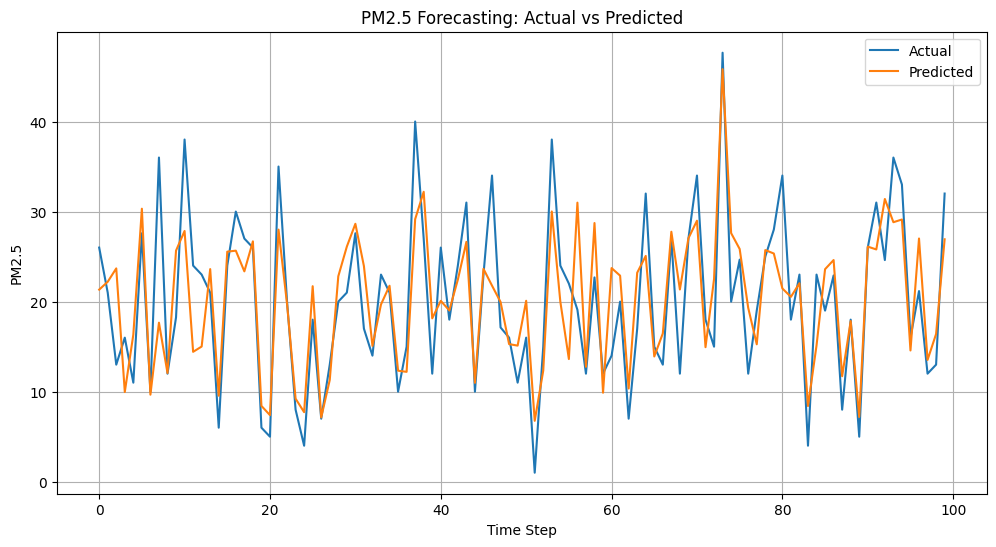

In [47]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


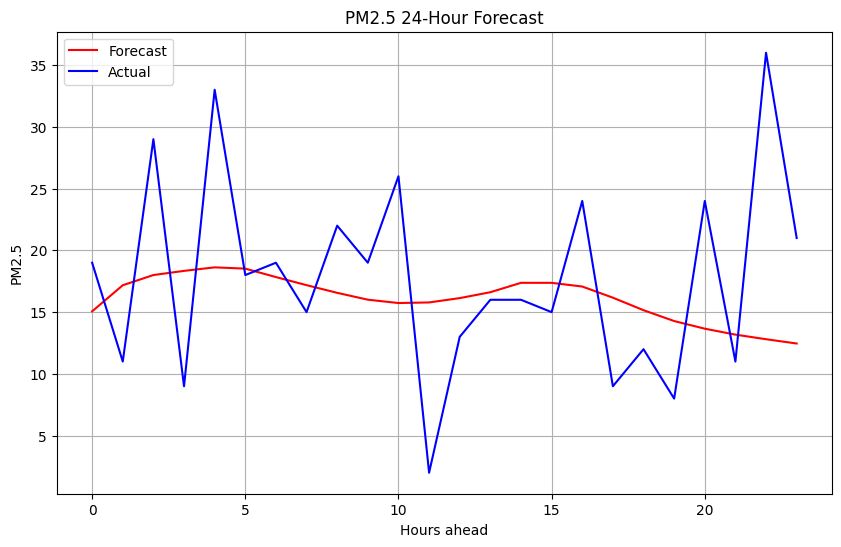

In [57]:
def forecast_multivariate_next_24h(model, last_sequence, scaler, pm25_idx):
    """
    Forecast PM2.5 values for the next 24 hours based on multivariate input
    
    Parameters:
    -----------
    model : Keras model
        Trained LSTM model
    last_sequence : numpy.ndarray
        Last sequence window with shape (1, seq_length, n_features)
    scaler : sklearn.preprocessing.MinMaxScaler
        Scaler used for all features
    pm25_idx : int
        Index of PM2.5 in the feature set
        
    Returns:
    --------
    numpy.ndarray
        Predicted PM2.5 values for next 24 hours
    """
    predictions = []
    current_sequence = last_sequence.copy()
    
    # Create a separate scaler just for PM2.5 to inverse transform predictions
    pm25_scaler = MinMaxScaler()
    pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]
    
    # Forecast next 24 hours one by one
    for _ in range(24):
        # Make prediction for next step
        next_pred = model.predict(current_sequence)
        predictions.append(next_pred[0, 0])
        
        # Create new sequence
        # Copy most recent 23 time steps
        new_sequence = current_sequence[0, 1:, :].copy()
        
        # Create the next time step with predicted PM2.5
        # Note: We're setting only PM2.5 value and keeping other features the same
        # In a real scenario, you might want to use forecasts of other features as well
        next_step = current_sequence[0, -1, :].copy()
        next_step[pm25_idx] = next_pred[0, 0]
        
        # Update sequence
        current_sequence = np.concatenate([new_sequence, next_step.reshape(1, -1)]).reshape(1, seq_length, -1)
    
    # Convert predictions back to original scale
    predictions = np.array(predictions).reshape(-1, 1)
    return pm25_scaler.inverse_transform(predictions)

# Get last sequence of data for prediction
last_sequence = X_test_lstm[0:1]  # Take the first test sequence
next_24h_pred = forecast_multivariate_next_24h(lstm_model, last_sequence, scaler, pm25_idx)

# Get actual values for comparison (if available)
actual_next_24 = None
if len(y_test_lstm) >= 24:
    actual_next_24 = y_test_actual[:24]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(24), next_24h_pred, 'r-', label='Forecast')
if actual_next_24 is not None:
    plt.plot(range(24), actual_next_24, 'b-', label='Actual')
plt.title('PM2.5 24-Hour Forecast')
plt.xlabel('Hours ahead')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
def lstm_model_builder(hp):
    model = tf.keras.models.Sequential()
    
    # Tune LSTM units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    
    model.add(tf.keras.layers.LSTM(
        units=lstm_units_1,
        return_sequences=True,
        input_shape=(seq_length, n_features),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1)
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Second LSTM layer
    model.add(tf.keras.layers.LSTM(
        units=hp.Int('lstm_units_2', min_value=16, max_value=64, step=16),
        return_sequences=True
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Conditional third LSTM layer
    if hp.Boolean('use_third_lstm'):
        model.add(tf.keras.layers.LSTM(units=hp.Int('lstm_units_3', min_value=8, max_value=32, step=8)))
        model.add(tf.keras.layers.BatchNormalization())
    
    # Dense layers
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=8, max_value=32, step=8),
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(1))
    
    # Compile with optimized learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    
    return model

# Configure the tuner
tuner = kt.Hyperband(
    lstm_model_builder,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='lstm_tuning',
    project_name='pm25_lstm'
)

d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Search for the best hyperparameters
tuner.search(
    X_train_lstm, y_train_lstm,
    epochs=100,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping]
)

Trial 76 Complete [00h 01m 19s]
val_loss: 0.01752505451440811

Best val_loss So Far: 0.009751049801707268
Total elapsed time: 01h 51m 35s

Search: Running Trial #77

Value             |Best Value So Far |Hyperparameter
32                |64                |lstm_units_1
0                 |0.2               |recurrent_dropout
0.4               |0                 |dropout_1
48                |16                |lstm_units_2
0.1               |0.4               |dropout_2
True              |True              |use_third_lstm
16                |16                |dense_units
0.0001            |0.01              |learning_rate
32                |16                |lstm_units_3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - loss: 0.2839 - val_loss: 0.0330
Epoch 2/2
  64/1437 

KeyboardInterrupt: 

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

Best hyperparameters: {'lstm_units_1': 96, 'recurrent_dropout': 0.1, 'dropout_1': 0.30000000000000004, 'lstm_units_2': 48, 'return_sequences': True, 'dropout_2': 0.0, 'use_third_lstm': True, 'dense_units': 24, 'learning_rate': 0.01, 'lstm_units_3': 16, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 4, 'tuner/round': 1, 'tuner/trial_id': '0028'}


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0993
Test Loss: 0.0982636958360672
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Mean Squared Error: 0.0983
Root Mean Squared Error: 0.3135
R² Score: -3.2982
Mean Squared Error: 662.4385
Root Mean Squared Error: 25.7379
R² Score: -3.2982


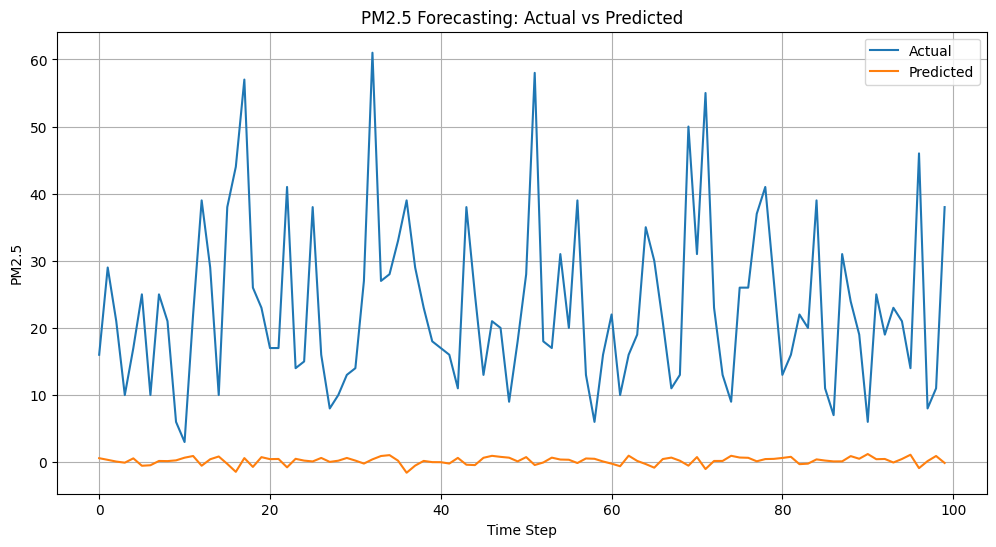

In [ ]:
# Evaluate on test set
test_loss = best_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = best_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()